Researching the impact of amount of dimensions for a certain epsilon.
Instead of having a linechart with the epsilons on the x-axis, we will show the dimensions for the heart dataset and seed dataset.
We do this only for the nd-Laplace algorithm.



In [243]:
from Helpers import helpers, UtilityPlotter
# we select epsilon 3.0 for now
epsilon = 3
plain_df, perturbed_df = helpers.load_plain_and_perturbed_dataset(epsilon, perturbed_path='../ExperimentRunners/data/nd-laplace-truncated/heart-dataset/', import_path='../data/heart-dataset/heart_numerical.csv')
plain_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,class
0,120.0,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,1.0
1,132.0,4.0,0.0,4.0,2.0,130.0,68.0,198.0,6.0,0.0
2,133.0,2.0,0.0,5.0,2.0,130.0,68.0,198.0,5.0,0.0
3,134.0,2.0,0.0,6.0,2.0,117.0,53.0,170.0,11.0,0.0
4,132.0,4.0,0.0,5.0,0.0,117.0,53.0,170.0,9.0,0.0


In [244]:
from sklearn.cluster import DBSCAN, KMeans, OPTICS

models = [KMeans(n_clusters=4, init="random", algorithm="lloyd")]

In [245]:
import numpy as np
import pandas as pd 


def run_for_dimensions_and_algorithms(X: pd.DataFrame, epsilon, model, perturbing_mechanisms, n_times = 10, dataset=None, import_path='../data/heart-dataset/heart_numerical.csv'):
    if(dataset is None):
        raise Exception('Dataset cannot be None')
    
    column_size = X.shape[1]
    dataframe = pd.DataFrame();
    for algorithm in perturbing_mechanisms:
        print('Running for algorithm ' + algorithm)
        perturbed_path = f'../ExperimentRunners/data/{algorithm}/{dataset}/'
        data = run_for_dimensions(epsilon, column_size, model, n_times, algorithm, import_path, perturbed_path)
        dataframe = pd.concat([dataframe, data], ignore_index=True)
    return dataframe

def run_for_dimensions(epsilon, max_columns, models, n_times = 10, model_name = None, import_path='./', perturbed_path='../ExperimentRunners/data/nd-laplace-truncated/heart-dataset/'):
    dataframe = {'type': [], 'dimensions': [], 'ari': [], 'ami': [], 'ch': [], 'sc': []}

    for col in range(4, max_columns):
        print('Adding one column each time...')
        data = perturbed_df.iloc[:,0:col]
        columns = data.columns
        print(data.shape)

        for model in models:
            algorithmName = model_name if model_name is not None else helpers.map_models_to_name(model)
            dataframe['type'].append(algorithmName)
            dataframe['dimensions'].append(col)
            ami_list = []
            ari_list = []
            ch_list = []
            sc_list = []
            for i in range(n_times):
                ami, ari, ch, sc = helpers.measure_external_validity_report(epsilon, model, import_path=import_path, perturbed_path=perturbed_path, columns=columns)
                ami_list.append(ami)
                ari_list.append(ari)
                ch_list.append(ch)
                sc_list.append(sc)
            ami = np.sum(ami_list) / n_times
            ari = np.sum(ari_list) / n_times
            sc = np.sum(sc_list) / n_times
            dataframe['ami'].append(ami)
            dataframe['ari'].append(ari)
            dataframe['ch'].append(np.sum(ch_list) / n_times)
            dataframe['sc'].append(np.sum(sc_list) / n_times)
    return pd.DataFrame(dataframe)



In [246]:
from matplotlib import pyplot as plt
import seaborn as sns


def run_for_dimensions_and_epsilons(X: pd.DataFrame, models, perturbing_mechanisms, epsilons, n_times = 10, dataset=None, import_path='../data/heart-dataset/heart_numerical.csv', save_path=None):
    complete_set = pd.DataFrame()
    for epsilon in epsilons:
        print('Running for epsilon ' + str(epsilon))
        dataframe = run_for_dimensions_and_algorithms(X, epsilon, models, perturbing_mechanisms, n_times=n_times, import_path=import_path, dataset=dataset)
        dataframe['epsilon'] = epsilon
        complete_set = pd.concat([complete_set, dataframe], ignore_index=True)

    if save_path is not None:
        complete_set.to_csv(save_path + '.csv')
    return complete_set

def plot_dimensions(metric: str, epsilon, dataframe, dataset, ylabel='Adjusted Rand Index (ARI)', xlabel='dimensions', save_path=None):
    dataframe_for_epsilon = dataframe.copy()
    dataframe_for_epsilon = dataframe_for_epsilon[dataframe_for_epsilon['epsilon'] == epsilon]
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_title(f"Scores per dimension, with metric: {metric.upper()} and epsilon: {epsilon} for dataset: {dataset}")
    #ax.set_title('Esilon ' + str(epsilon))
    ax.set_xlabel(xlabel)    
    ax.set_ylabel(ylabel)
    sns.lineplot(x='dimensions', y=metric, data=dataframe_for_epsilon, style='type', hue='type', errorbar=None, markers=True, legend=True, ax=ax)
    #plt.title(f'{metric} for different dimensions and epsilons'.capitalize())

    if save_path is not None:
        fig.savefig(save_path + '.png')
        plt.clf()
    else:
        plt.show()


In [247]:
dataframe_dimension_scores = run_for_dimensions_and_epsilons(
    plain_df, 
    models, 
    ['nd-laplace', 'nd-laplace-truncated', 'nd-laplace-optimal-truncated', 'nd-piecewise'], 
    helpers.get_experiment_epsilons(), dataset='heart-dataset', n_times=1)


Running for epsilon 0.1
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)
Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score failed, defaulting to 0 as score
Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 179, in where
KeyboardInterrupt: 
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 179, in where
KeyboardInterrupt: 
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 0.5
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 0.7
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 1
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 1.5
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 2
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 2.5
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 3
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 3.5
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 5
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 7
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for epsilon 9
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 5)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 6)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 7)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 8)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding one column each time...
(2126, 9)


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [248]:
dataframe_dimension_scores.head()

,type,dimensions,ari,ami,ch,sc,epsilon
0,nd-laplace,4,0.034859,0.069284,619.817660,0.228337,0.1
1,nd-laplace,5,0.238503,0.303056,518.961093,0.208410,0.1
2,nd-laplace,6,0.261491,0.315837,461.925876,0.178444,0.1
3,nd-laplace,7,0.538986,0.608644,564.830836,0.247412,0.1
4,nd-laplace,8,0.372320,0.460050,491.171769,0.226397,0.1


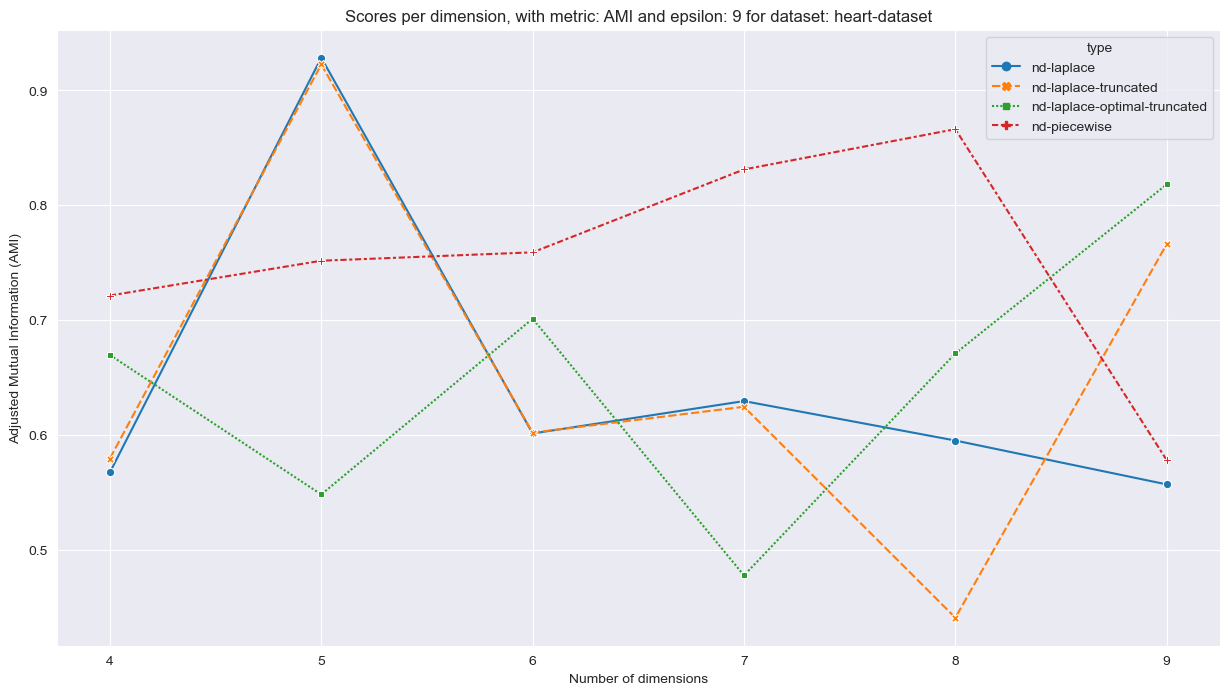

In [249]:
plot_dimensions('ami', 9, dataframe_dimension_scores, 'heart-dataset', ylabel='Adjusted Mutual Information (AMI)', xlabel='Number of dimensions')

## Security analysis

In [255]:
import pandas as pd
def find_algorithm_by_name(name):
    l_nd_laplace_mechanism = ldp_mechanism.ldp_mechanism()
    if name == 'nd-laplace-optimal-truncated':
        return l_nd_laplace_mechanism.randomise
    elif name == 'nd-piecewise':
        return helpers.generate_piecewise_perturbation
    else:
        raise Exception('Algorithm not found')

def run_security_mi_for_dimensions_and_algorithm(X: pd.DataFrame, algorithm_names, epsilons, n_times=1, target_column='class', save_path=None):
    column_size = X.shape[1]
    x_without_target = X.copy()
    x_without_target.drop(columns=[target_column], inplace=True)
    y_true = X[target_column]
    targets = len(X[target_column].unique())
    total_df = pd.DataFrame()
    for algorithm_name in algorithm_names:
        algorithm = helpers.find_algorithm_by_name(algorithm_name)
        for col in range(4, column_size + 1):
            print('Adding one column each time...')
            data = x_without_target.iloc[:,0:col]
            columns = data.columns
            print(f"data-shape: {data.shape}")
            security_df = helpers.run_mi_experiments(data, y_true, epsilons, n_times=n_times, columns=columns, algorithm=algorithm, targets=targets)
            security_df['dimensions'] = col
            security_df['mechanism'] = algorithm_name
            total_df = pd.concat([total_df, security_df], ignore_index=False)

    if save_path is not None:
        total_df.to_csv(save_path + '.csv')
    return total_df

In [256]:
from Helpers import ldp_mechanism
#nd_laplace_mechanism = ldp_mechanism.ldp_mechanism()
#mechanism = nd_laplace_mechanism.randomise
dataframe_mi_per_dimension = run_security_mi_for_dimensions_and_algorithm(plain_df, ['nd-laplace-optimal-truncated', 'nd-piecewise'], [2, 5], n_times=10)

     baseline value  accelerations  fetal_movement  uterine_contractions  \
0        127.200000       0.000000        0.000000              3.400000   
1        131.436305       3.601367        1.223428              2.533609   
2        116.600000       3.600000        0.000000              3.400000   
3        139.196904       9.817393        1.161293              7.056983   
4        130.608344       4.587681        0.306113              0.940679   
..              ...            ...             ...                   ...   
260      131.954790       1.065993        5.854626              1.978030   
261      124.488914       2.063053        0.788299              6.416395   
262      137.800000      18.000000        0.000000              3.400000   
263      148.400000       0.000000        0.000000              0.000000   
264      133.100527       0.323652        3.949753              0.004465   

     light_decelerations  histogram_width  histogram_min  histogram_max  \
0           

In [257]:
dataframe_mi_per_dimension.tail()

,epsilon,shokri_mi_adv,attack_adv,tpr,fpr,run,dimensions,mechanism
15,5,0.299248,0.666110,"[0.0, 0.6, 1.0]","[0.0, 0.3007518796992481, 1.0]",5,10,nd-piecewise
16,5,0.138218,0.549581,"[0.0, 0.7660377358490567, 1.0]","[0.0, 0.6278195488721805, 1.0]",6,10,nd-piecewise
17,5,0.137622,0.563864,"[0.0, 0.6075471698113207, 1.0]","[0.0, 0.4699248120300752, 1.0]",7,10,nd-piecewise
18,5,0.291885,0.647248,"[0.0, 0.6415094339622641, 1.0]","[0.0, 0.34962406015037595, 1.0]",8,10,nd-piecewise
19,5,0.171443,0.582734,"[0.0, 0.6037735849056604, 1.0]","[0.0, 0.4323308270676692, 1.0]",9,10,nd-piecewise


,epsilon,shokri_mi_adv,attack_adv,tpr,fpr,run,dimensions,mechanism
15,5,0.145340,0.561825,"[0.0, 0.660377358490566, 1.0]","[0.0, 0.5150375939849624, 1.0]",5,10,nd-piecewise
16,5,0.092793,0.536440,"[0.0, 0.6830188679245283, 1.0]","[0.0, 0.5902255639097744, 1.0]",6,10,nd-piecewise
17,5,0.205802,0.580329,"[0.0, 0.7433962264150943, 1.0]","[0.0, 0.5375939849624061, 1.0]",7,10,nd-piecewise
18,5,0.115307,0.546946,"[0.0, 0.6716981132075471, 1.0]","[0.0, 0.556390977443609, 1.0]",8,10,nd-piecewise
19,5,0.254575,0.607927,"[0.0, 0.7169811320754716, 1.0]","[0.0, 0.462406015037594, 1.0]",9,10,nd-piecewise


In [260]:
def plot_mi_dimensions(epsilon, dataframe, dataset, ylabel='Mutual Information (MI)', xlabel='dimensions', save_path=None):
    dataframe_for_epsilon = dataframe.copy()
    dataframe_for_epsilon = dataframe_for_epsilon[dataframe_for_epsilon['epsilon'] == epsilon]
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_title(f"Scores per dimension, for mechanisms: nd-laplace-optimal-truncated and piecewise with {epsilon} for dataset: {dataset}")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    twinx = ax.twinx()
    dataframe_for_epsilon['tpr'] = dataframe_for_epsilon['tpr'].apply(lambda x: x[1])
    sns.lineplot(x='dimensions', y='shokri_mi_adv', data=dataframe_for_epsilon, hue='mechanism', style='mechanism', errorbar=None, markers=True, legend=True, ax=ax)
    sns.lineplot(x='dimensions', y='tpr', data=dataframe_for_epsilon, hue='mechanism', errorbar=None, legend=False, ax=twinx, alpha=0.3)

     # Set the x-axis limits to start from 0
    #ax.set_xlim(0, dataframe_for_epsilon['dimensions'].max())
    #twinx.set_xlim(0, dataframe_for_epsilon['dimensions'].max())

    plt.legend()
    if save_path is not None:
        fig.savefig(save_path + '.png')
        plt.clf()
    else:
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


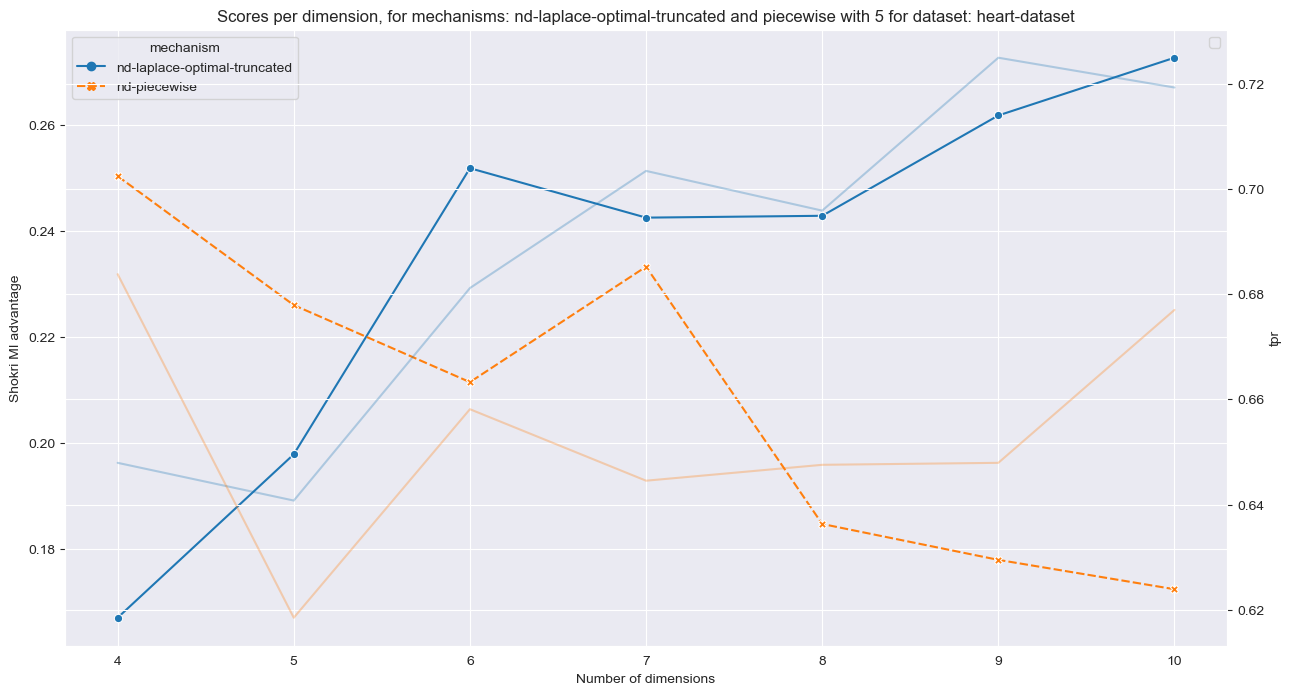

In [261]:
plot_mi_dimensions(5, dataframe_mi_per_dimension, 'heart-dataset', ylabel='Shokri MI advantage', xlabel='Number of dimensions')